Dataset folder
https://drive.google.com/drive/folders/1o0jugzouwCNBc0ooodfDT_ViSw4QP2GR?usp=drive_link

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import matplotlib.pyplot as plt

london_arr = pd.read_csv('/content/london_arrivals_processed.csv', low_memory=False)

In [2]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(london_arr)

,ECTRL ID,ADEP,ADEP LATITUDE,ADEP LONGITUDE,ADES,ADES LATITUDE,ADES LONGITUDE,FILED OFF BLOCK TIME,FILED ARRIVAL TIME,ACTUAL OFF BLOCK TIME,ACTUAL ARRIVAL TIME,AC TYPE,AC OPERATOR,AC REGISTRATION,ICAO FLIGHT TYPE,STATFOR MARKET SEGMENT,REQUESTED FL,ACTUAL DISTANCE FLOWN (NM),ICAO_CODE,ISO_COUNTRY,NAME,ARRIVAL_DAY_OF_WEEK,ARRIVAL_DATE,ARRIVAL_DAY_OF_WEEK_NUM,ACTUAL_DURATION_MINUTES
0,264867993,VHHH,22.30889,113.91472,EGLL,51.47750,-0.46139,2023-09-01 00:00:00,2023-09-01 13:42:48,2023-09-01 00:24:00,2023-09-01 14:23:14,A359,CPA,BLQA,S,Not Classified,341.0,6019,EGLL,GB,London Heathrow Airport,Friday,2023-09-01,4,839.233333
1,264867996,KMIA,25.80000,-80.28333,EGLL,51.47750,-0.46139,2023-09-01 00:00:00,2023-09-01 09:25:24,2023-08-31 23:40:00,2023-09-01 09:10:42,B77W,AAL,N730AN,S,Not Classified,330.0,4217,EGLL,GB,London Heathrow Airport,Friday,2023-09-01,4,570.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39702,265826524,CYYC,51.12250,-114.01333,EGKK,51.14806,-0.19028,2023-09-30 23:45:00,2023-10-01 07:28:57,2023-09-30 23:54:00,2023-10-01 08:03:57,B789,WJA,CGUDO,S,Not Classified,350.0,3933,EGKK,GB,London Gatwick Airport,Sunday,2023-10-01,6,489.950000
39703,265809983,VHHH,22.30889,113.91472,EGLL,51.47750,-0.46139,2023-09-30 23:50:00,2023-10-01 13:18:05,2023-10-01 00:20:00,2023-10-01 14:04:49,B77W,CPA,BKQG,S,Not Classified,302.0,6039,EGLL,GB,London Heathrow Airport,Sunday,2023-10-01,6,824.816667


In [3]:
london_arr['ACTUAL ARRIVAL TIME'] = pd.to_datetime(london_arr['ACTUAL ARRIVAL TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
london_arr = london_arr.dropna(subset=['ACTUAL ARRIVAL TIME']) # arima can't handle missing values

# there was partial data for 2023-10-01 and it affected the forecast, so I removed it
london_arr = london_arr[london_arr['ACTUAL ARRIVAL TIME'].dt.date != pd.to_datetime('2023-10-01').date()]

In [4]:
daily_arr = london_arr.groupby(london_arr['ACTUAL ARRIVAL TIME'].dt.date).size() # how many arrivals on each date
daily_arr = pd.Series(daily_arr, index=pd.to_datetime(daily_arr.index))

print(daily_arr)

ACTUAL ARRIVAL TIME
2023-09-01    1225
2023-09-02    1232
2023-09-03    1362
2023-09-04    1342
2023-09-05    1346
2023-09-06    1322
2023-09-07    1376
2023-09-08    1381
2023-09-09    1200
2023-09-10    1351
2023-09-11    1391
2023-09-12    1335
2023-09-13    1363
2023-09-14    1337
2023-09-15    1383
2023-09-16    1207
2023-09-17    1292
2023-09-18    1358
2023-09-19    1334
2023-09-20    1325
2023-09-21    1344
2023-09-22    1358
2023-09-23    1219
2023-09-24    1293
2023-09-25    1336
2023-09-26    1326
2023-09-27    1319
2023-09-28    1347
2023-09-29    1370
2023-09-30    1186
dtype: int64


**ARIMA model**

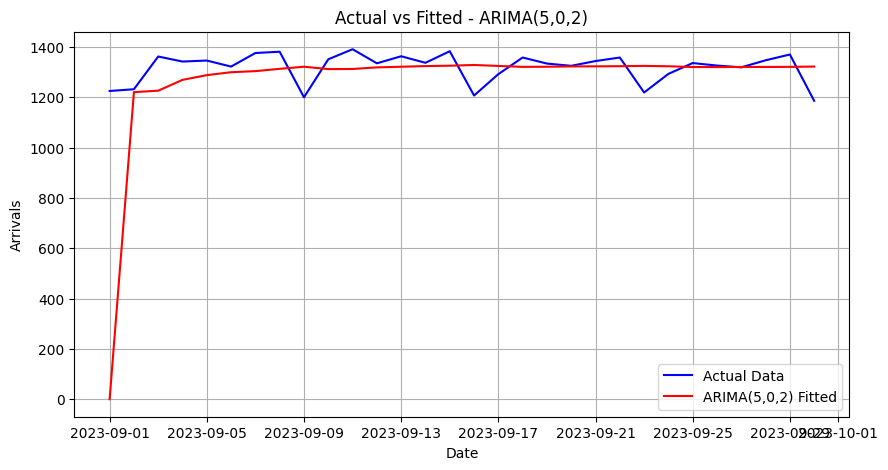

In [28]:
#The fitted values from ARIMA(5,0,2) closely follow the actual data, suggesting that this configuration captures short-term dynamics effectively.
plt.figure(figsize=(10,5))
plt.plot(daily_arr, label='Actual Data', color='blue')
plt.plot(model_fit.fittedvalues, label='ARIMA(5,0,2) Fitted', color='red')
plt.title('Actual vs Fitted - ARIMA(5,0,2)')
plt.xlabel('Date')
plt.ylabel('Arrivals')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
model = ARIMA(daily_arr, order=(5,0,2)) # not sure about order
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [13]:
steps = 14 # prediction for the next 14 days
forecast_dates =[]
forecast = model_fit.forecast(steps=steps)

last_date = daily_arr.index[-2] # start prediction after this date

for i in range(1, steps + 1):
    forecast_dates.append(last_date + timedelta(days=i)) # list of days we're forecasting for

forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_Arrivals': forecast}).set_index('Date')
print(forecast_df)

            Forecast_Arrivals
Date                         
2023-09-30        1322.232299
2023-10-01        1351.315915
2023-10-02        1316.287333
2023-10-03        1320.602210
2023-10-04        1395.721843
2023-10-05        1335.654913
2023-10-06        1257.542807
2023-10-07        1293.656546
2023-10-08        1342.761430
2023-10-09        1315.997932
2023-10-10        1323.880998
2023-10-11        1370.350062
2023-10-12        1344.018225
2023-10-13        1283.736356


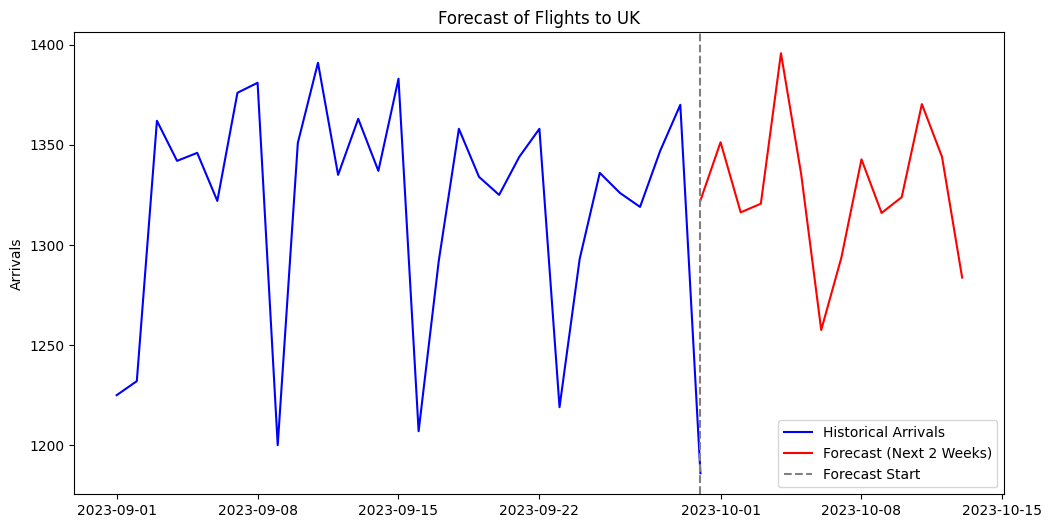

In [14]:
plt.figure(figsize=(12,6))
plt.plot(daily_arr.index, daily_arr, label='Historical Arrivals', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast_Arrivals'], label='Forecast (Next 2 Weeks)', color='red')
plt.title('Forecast of Flights to UK')
plt.ylabel('Arrivals')
plt.axvline(x=forecast_df.index[0], color='grey', linestyle='--', linewidth=1.5, label='Forecast Start')
plt.legend()
plt.show()